<a href="https://colab.research.google.com/github/sathvik-ujwal/Lab-Codes/blob/main/MACHINE%20LEARNING/Codes/hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def calculate_distance(cluster1, cluster2, data, linkage="single"):
    if linkage == "single":
        return np.min([np.linalg.norm(data[i] - data[j]) for i in cluster1 for j in cluster2])
    elif linkage == "complete":
        return np.max([np.linalg.norm(data[i] - data[j]) for i in cluster1 for j in cluster2])
    elif linkage == "average":
        distances = [np.linalg.norm(data[i] - data[j]) for i in cluster1 for j in cluster2]
        return np.mean(distances)

In [9]:
def hierarchial_clustering(data, linkage="single"):
    clusters = [[i] for i in range(len(data))]

    proximity_matrix = np.full((len(data), len(data)), np.inf)
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            proximity_matrix[i][j] = proximity_matrix[j][i] = calculate_distance([i], [j], data, linkage)

    while len(clusters) > 1:
        min_dist = np.inf
        c1, c2 = -1, -1

        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = calculate_distance(clusters[i], clusters[j], data, linkage)
                if dist < min_dist:
                    min_dist = dist
                    c1, c2 = i, j

        clusters[c1] = clusters[c1] + clusters[c2]
        del clusters[c2]

        proximity_matrix = np.full((len(clusters), len(clusters)), np.inf)
        for i in range(len(clusters)):
            for j in range(1 + 1, len(clusters)):
                proximity_matrix[i][j] = proximity_matrix[j][i] = calculate_distance(clusters[i], clusters[j], data, linkage)

        print(f"Clusters: {clusters}")

    return clusters


In [10]:
data = np.array([18, 22, 25, 47, 43, 43]).reshape(-1, 1)
final_clusters =hierarchial_clustering(data, linkage="single")
print("Final Cluster Structure:", final_clusters)

Clusters: [[0], [1], [2], [3], [4, 5]]
Clusters: [[0], [1, 2], [3], [4, 5]]
Clusters: [[0, 1, 2], [3], [4, 5]]
Clusters: [[0, 1, 2], [3, 4, 5]]
Clusters: [[0, 1, 2, 3, 4, 5]]
Final Cluster Structure: [[0, 1, 2, 3, 4, 5]]


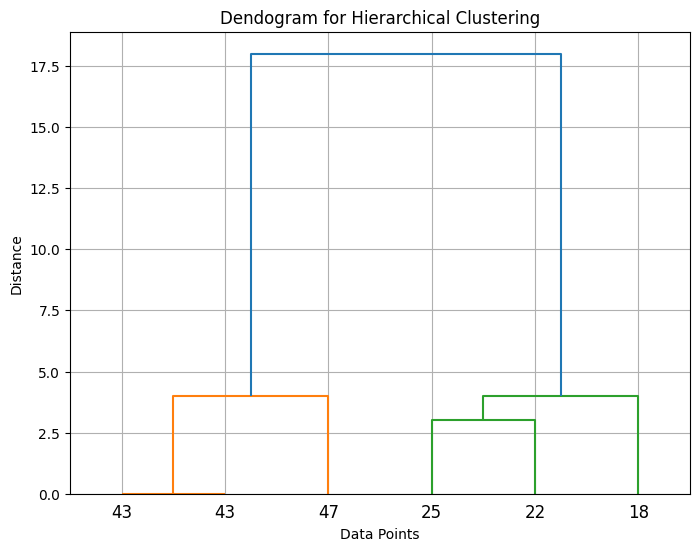

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data, method="single")

plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=data.flatten(), orientation="top", distance_sort="descending")
plt.title("Dendogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid()
plt.show()